In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Show first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
# Initialize KMeans with 3 clusters (since there are 3 species in Iris)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
df['cluster'] = kmeans.fit_predict(df.iloc[:, :-1])  # Exclude species column


In [5]:
# Compare the cluster labels with actual species labels
print("Confusion Matrix:\n")
print(confusion_matrix(df['species'], df['cluster']))


Confusion Matrix:

[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


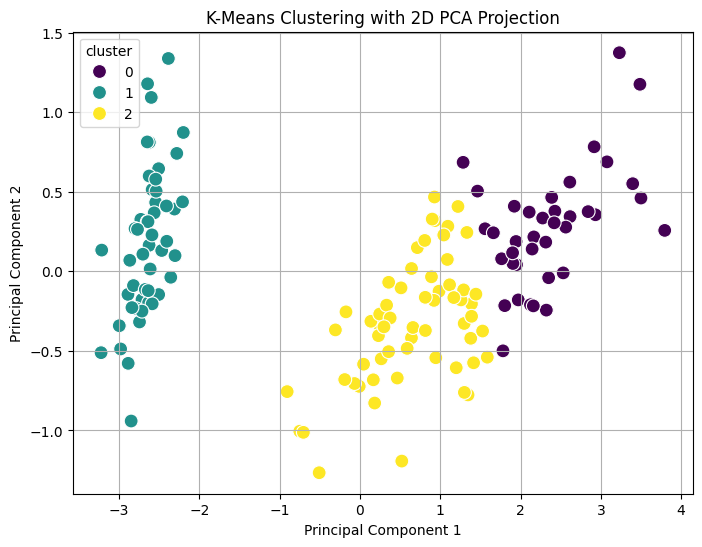

In [6]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.iloc[:, :-2])

# Add PCA data to DataFrame
df['pca1'] = pca_data[:, 0]
df['pca2'] = pca_data[:, 1]

# Plotting the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title("K-Means Clustering with 2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


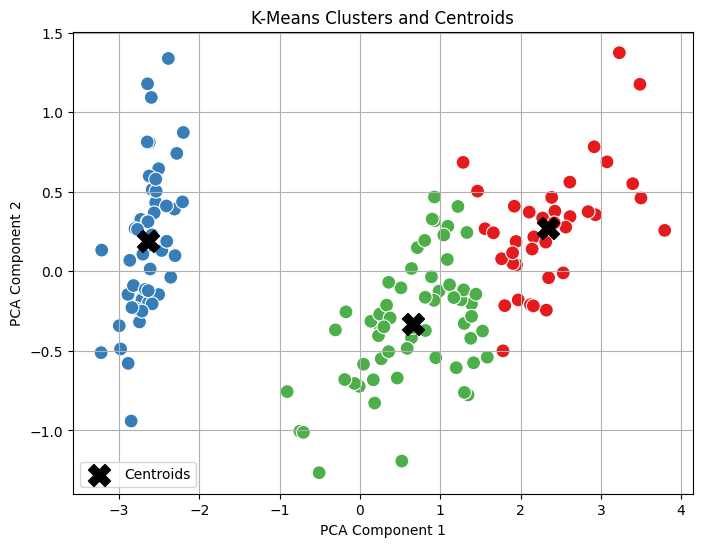

In [7]:
# Plot cluster centers
centroids = pca.transform(kmeans.cluster_centers_)  # PCA of centroids

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set1', s=100, legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, marker='X', c='black', label='Centroids')
plt.title("K-Means Clusters and Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
